In [1]:
#Root 경로로 이동
%cd ..

d:\MyGit\BrainMR_MCI


In [2]:
#참고사이트 https://bo-10000.tistory.com/134
import torchio as tio
from torch.utils.data import DataLoader
import dataloader
import utils
import pandas as pd

In [3]:
config = utils.load_config()
df_dataset = pd.read_csv(config['PATH_DATASET_CSV'])
X_train,X_test,y_train,y_test = dataloader.dataset_split(df_dataset)
#y_train = y_train.str.replace('MCI','1').replace('CN','0').replace('AD','2')
#y_test = y_test.str.replace('MCI','1').replace('CN','0').replace('AD','2')

In [4]:
traindata=dataloader.MRIDataset(X_train,y_train)
transform = tio.RandomAffine(degrees=(0,0,90)) #이미지 좌우로 랜덤 생성
aug_traindata=dataloader.MRIDataset(X_train,y_train,transform)

testdata=dataloader.MRIDataset(X_test,y_test)

train_dataloader = DataLoader(traindata, batch_size=1, shuffle=False)
test_dataloader  = DataLoader(testdata, batch_size=1, shuffle=False)

In [70]:
transform = tio.RandomAffine(degrees=(0,0,90)) #이미지 좌우로 랜덤 생성


In [5]:
image,label=aug_traindata.__getitem__(0)

In [73]:
img_transform = transform(image)

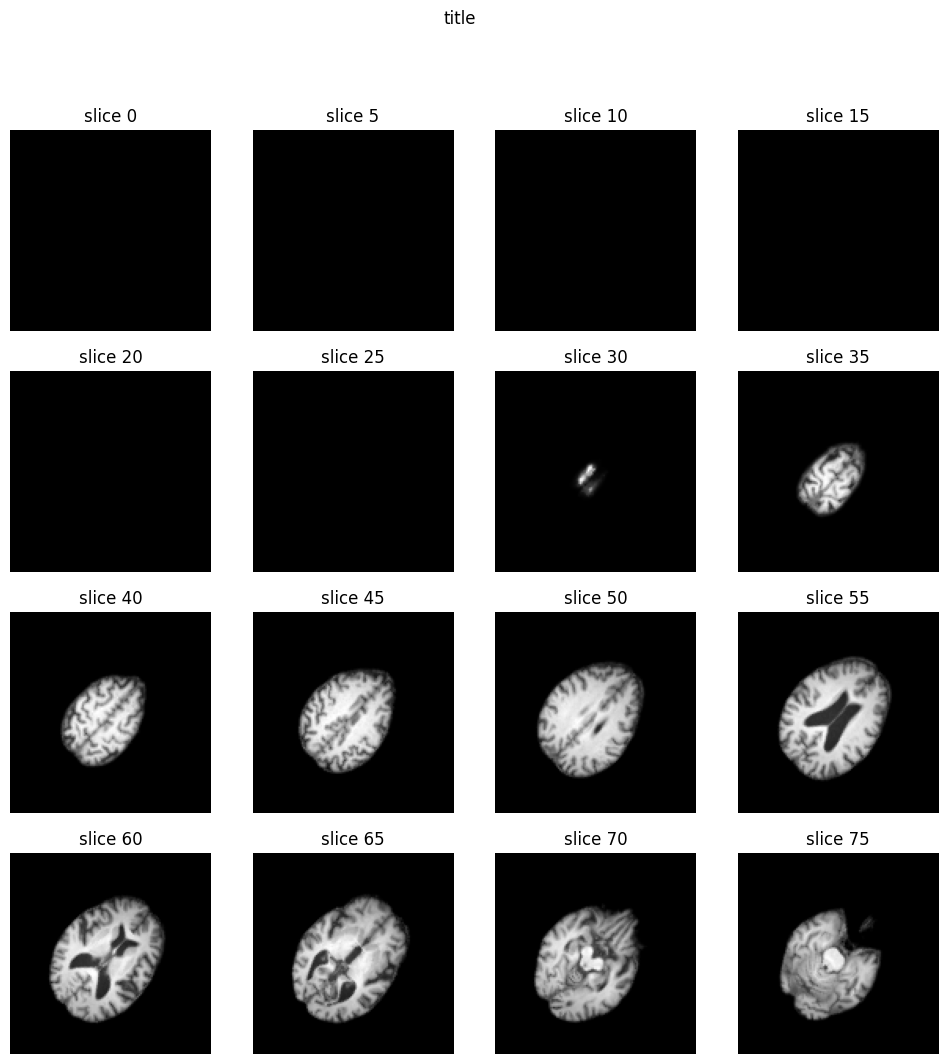

In [11]:
utils.stack_plot(image[0,:,:,:],4,4,0,5)